<a href="https://colab.research.google.com/github/rjlobosco/Math711/blob/main/Math_711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

Practical teaching

5.1 Very first step: Forward Euler scheme

Run the file exponential.py.

Implement a Forward Euler scheme for the equation:

du/dt = -k u(t)

a) Uncomment and complete the function Forward_Euler

b) Uncomment the TIME LOOP instruction, and the plot instruction in POST-PROCESS

c) Compare with the exact solution

d) Modify the time steps. Comments texto em itálico


0.05263157894736842


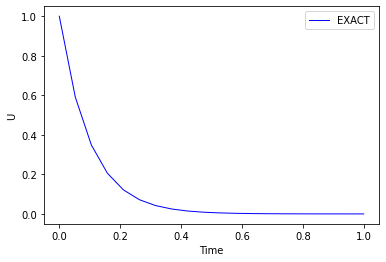

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Exponential ODE
    u' = -K u
"""


import numpy as np
import matplotlib.pyplot as plt


#def Forward_Euler(u):
#    up = ... (TO COMPLETE)
#    return up

# parameters
K = 10.

# time
t0 = 0.
t1 = 1.

# number of time iterations
N = 20

time = np.linspace(t0, t1, N)
dt = time[1]-time[0]
print(dt)

# variables
up = np.zeros(N)

# initialization
up[0] = 1

# TIME LOOP
#for i in range(N-1):
#    u0 = up[i]
#    up[i+1] = Forward_Euler(u0)
    

# POST-PROCESS
# plt.plot(time, up, color="red", linewidth=1., linestyle="-", label="FE")
plt.plot(time, np.exp(-K*time), color="blue",  linewidth=1., linestyle="-", label="EXACT")
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('U')
# Show result on screen
plt.show()

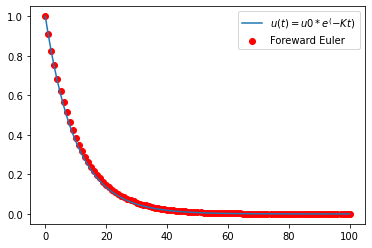

In [ ]:
u0 = 1#input("Enter initial value: ")
dt = 1#input("Enter time increment: ")
tf = 100#input("Enter final time: ")
K = 0.1#input("Enter K: ")

t = [0]
u_E = [u0]
u_A = [u0]
ts = int(tf/dt)

for i in range(ts):
    
    tn = (i+1)*dt
    un_E = u_E[i]/(1+(K*dt))
    un_A = u0*math.exp(-K*tn)
    t.append(tn)
    u_E.append(un_E)
    u_A.append(un_A)

plt.scatter(t[:],u_E[:], c='r', label='Foreward Euler')   
plt.plot(t[:],u_A[:], label='$u(t) = u0*e^(-Kt)$')
plt.legend()
plt.show()

5.2 Runge-Kutta 4 method. Application: Lotka Volterra system

Consider a population of preys, let us say weasels, and a population of predators, for example foxes, both of them evolving in time t. The number of weasels, noted u(t) and the number of foxes noted v(t), foloow the Lotka-Voleterra model:

u̇(t) = α u(t) − β u(t)v(t)
 
v̇(t) = −γ v(t) + δ u(t)v(t)

The coefficients occuring into the model have the following interpretation: α > 0 is the birth rate of the preys, and γ > 0 is the natural death rate of the predators. The positive coefficients β and δ model the interaction between the two populations.

a) Write a Forward Euler scheme for the Lotka-Voltera model. For all that follows, consider the case for which β = δ = 1 and an initial population of preys and predators of 4 individuals for each of them.

b) Verify that the function fe in the the script lotka_volterra.py corresponds to a forward Euler scheme for the Lotka-Volterra model that takes as input the variables u(t), v(t) and gives the output the fields u(t + ∆t), v(t + ∆t).

c) Run the script lotka_volterra.py. How to interprete the graph?

d) Increase the time step by diminishing the number of time iteration. How to interpret the differences of the result between a big time step (' 5 × 10 −2 ) and a smaller one (' 5 × 10 −4 )?

e) Is it relevant to use a very small time step (' 5 × 10 −5 ) ?

f) Implement a function rk4 similar to the function fe :

For a differential equation ẏ = f (t, y) with the inital value y(t 0 ) = t0


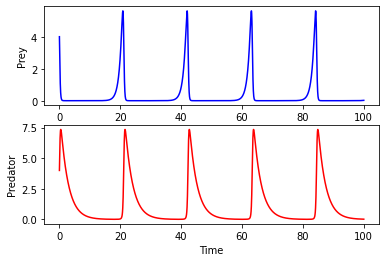

In [ ]:
from scipy.integrate import odeint
alpha =1.1
beta= 1
delta=1
gamma=0.4

y0=[4,4]

params=[alpha, beta, delta, gamma]
def sim (variables, t, params):
  x=variables[0] #prey population level
  y=variables[1] #predator population level

  alpha = params [0]
  beta  = params [1]
  delta = params [2]
  gamma = params [3]

  dxdt =alpha*x-beta*x*y
  dydt=delta*x*y-gamma*y
  return [dxdt,dydt]


y=odeint(sim,y0,t,args=(params,))

ax1 = plt.subplot(211)
ax1.plot(t,y[:,0],color="b")
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(t,y[:,1],color="r")


ax1.set_ylabel("Prey")
ax2.set_ylabel("Predator")
ax2.set_xlabel("Time")
plt.show()

Nombre de points souhaités ? 100


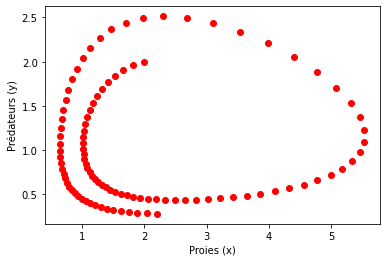

In [ ]:
# ## RESOLUTION DES EQUATIONS DE LOTKA-VOLTERRA (1925). #
# METHODE D'EULER. SCHEMA EXPLICITE.  Forward           #
# ==================================================    #


# Les paramètres du problème
# ==========================
alpha, beta, gamma, delta = 1.1, 1, 1, 0.4
# Conditions initiales
# ====================
x0, y0 = 2, 2
# Nombre de points souhaités
# ==========================
npoints = int(input('Nombre de points souhaités ? '))
# Paramètres de l'algorithme
# ==========================
pas = 0.1
# Le coeur de l'algorithme : le schéma numérique proprement dit.#

# Initialisation des tableaux des abscisses et des ordonnées (npoints valeurs).
# Ces tableaux sont initialisés avec des 0.
x, y = np.zeros(npoints), np.zeros(npoints)
x[0], y[0] = x0, y0# Le schéma numérique.
for i in range(npoints-1):   
    x[i+1] = x[i] * (1 + pas * (alpha - beta * y[i]))  
    y[i+1] = y[i] * (1 - pas * (gamma - delta * x[i]))

# Affichage graphique# ===================
# On efface le graphique précédent
plt.clf()
# Génération des points du graphique à partir des tableaux x et y.
plt.plot(x,y,'ro',label = str(npoints) + ' points')
# Titreplt.title('Résolution des équations de Lotka-Volterra (1925)',style='italic')
# Légendes des axes
plt.xlabel('Proies (x)')
plt.ylabel('Prédateurs (y)')
# Positionnement de la légendeplt.legend(loc = 'upper left')

# Affichage graphique
plt.show()

0.005000500050005001


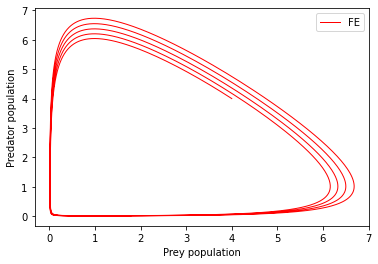

In [ ]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Lotka Volterra :
u' = au-uv
v' = -cv + uv
"""

import numpy as np
import matplotlib.pyplot as plt

# TODO:
# def rk4(x1,y1):
#    return x,y

def fe(x1,y1):
    x = x1 + dt*(a*x1 - x1*y1)
    y = y1 + dt*(-c*y1 + x1*y1)
    return x,y

# parameters
a = 1.
c = 1.

# time
t0 = 0.
t1 = 50.

# number of time iterations
N = 10000

time = np.linspace(t0, t1, N)
dt = time[1]-time[0]
print(dt)

# variables
u_fe = np.zeros(N)
v_fe = np.zeros(N)
#u = np.zeros(N)
#v = np.zeros(N)

# initialization
u_fe[0] = 4
v_fe[0] = 4
#u[0] = 4
#v[0] = 4

for i in range(N-1):
    u0_fe = u_fe[i]
    v0_fe = v_fe[i]
    u_fe[i+1], v_fe[i+1] = fe(u0_fe,v0_fe)
    
 #   u0 = u[i]
 #   v0 = v[i]
 #   u[i+1], v[i+1] = rk4(u0,v0)
    

# post-process
#plt.plot(u, v, color="blue", linewidth=2.5, linestyle="-", label="RK4")
plt.plot(u_fe, v_fe, color="red", linewidth=1., linestyle="-", label="FE")
plt.legend(loc='upper right')
plt.xlabel('Prey population')
plt.ylabel('Predator population')
# Show result on screen
plt.show()

2.5 Consider the spring-mass model in 1D, 


x" + ω^2 x = 0


where the pulsation ω corresponds to the ratio between the stiffness k of the spring and its mass m.
1. Show that the second-order differential equation is equivalent to the first-order system:
ż = Az
2. Write down an explicit scheme (Forward Euler) and an implicit scheme (Backward Euler) for this
differential system.
3. In what follows, assume ω = 1. Compute the fourth values of the numerical solution z 1 , z 2 , z 3 , z 4
associated to the FE and BE schemes, using the initial condition x(0) = 0 and y(0) = 1, and a time
step dt = 0.1. Extrapolate and comment the result.
4. The spring-mass system is supposed non dissipative. Therefore, the mechanical energy, composed by
the sum of the kinetic energy with the potential energy is constant along the time.
Show that the FE scheme, nor the BE scheme, preserve exactly the discrete mechanical energy along
the time: these methods produce a numerical gain or a numerical loss, that does not traduce a physical
behaviour.

With a little, yet very common, trick we can rewrite the Equation as a first-order system of two differential equations. 
We introduce u = x and v =  x' = u' as two new unknown functions. The two
corresponding equations arise from the definition v =u' and the original equation x" + ω^2 x = 0, (Notice that we can use u"=v' to remove the second-order derivative from Newton’s 2nd law.
We can now apply the Forward Euler method 
u^(n+1)= u^(n)+ {(delta t) (v^(n))}



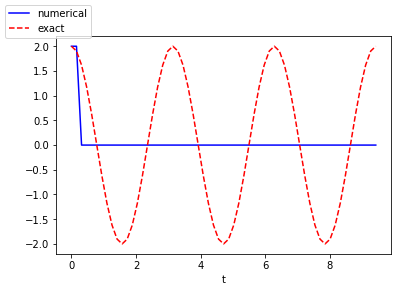

<Figure size 432x288 with 0 Axes>

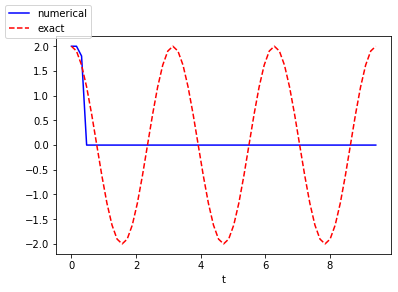

<Figure size 432x288 with 0 Axes>

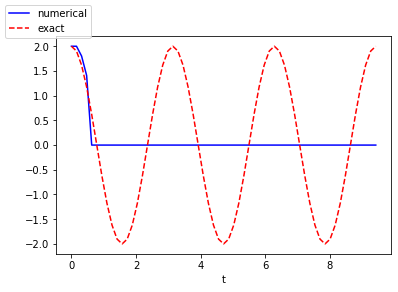

<Figure size 432x288 with 0 Axes>

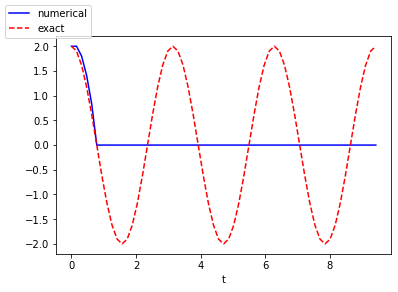

<Figure size 432x288 with 0 Axes>

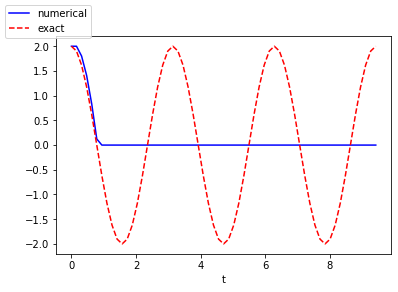

<Figure size 432x288 with 0 Axes>

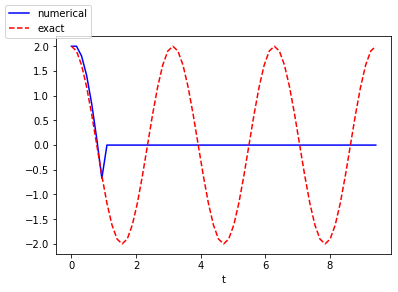

<Figure size 432x288 with 0 Axes>

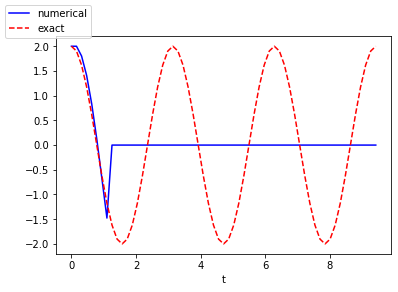

<Figure size 432x288 with 0 Axes>

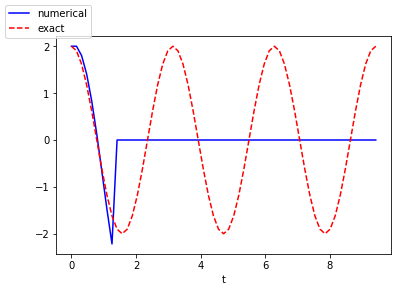

<Figure size 432x288 with 0 Axes>

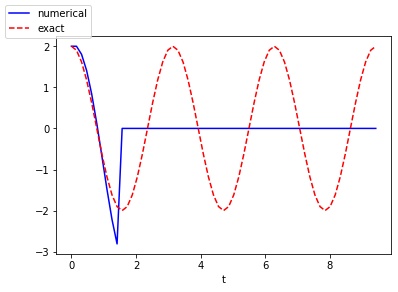

<Figure size 432x288 with 0 Axes>

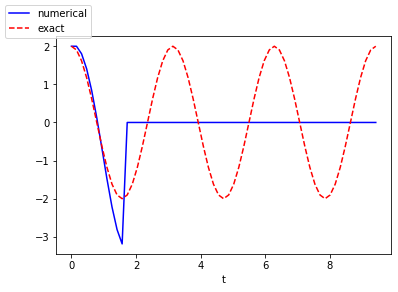

<Figure size 432x288 with 0 Axes>

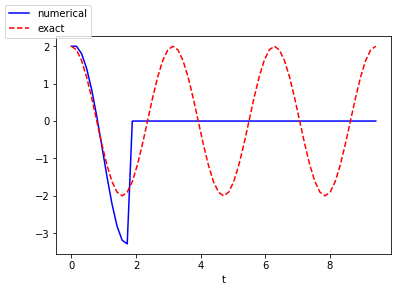

<Figure size 432x288 with 0 Axes>

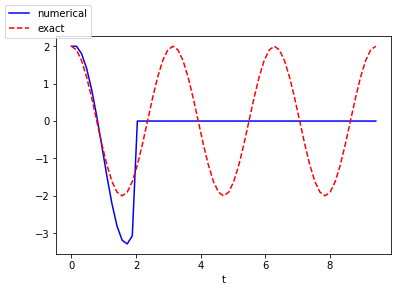

<Figure size 432x288 with 0 Axes>

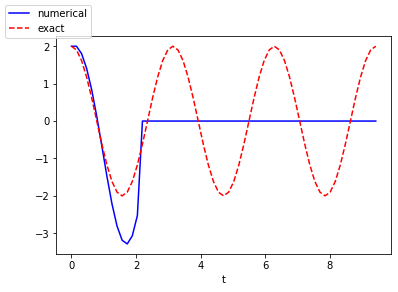

<Figure size 432x288 with 0 Axes>

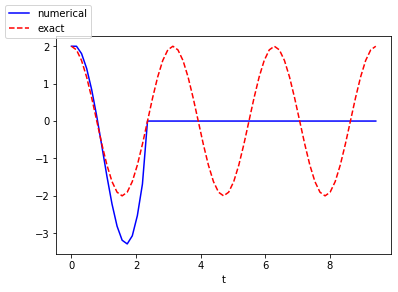

<Figure size 432x288 with 0 Axes>

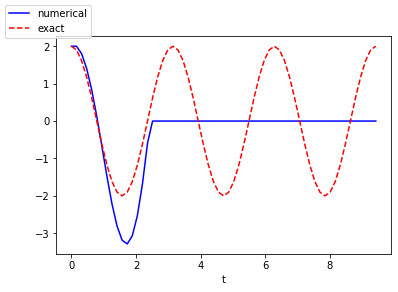

<Figure size 432x288 with 0 Axes>

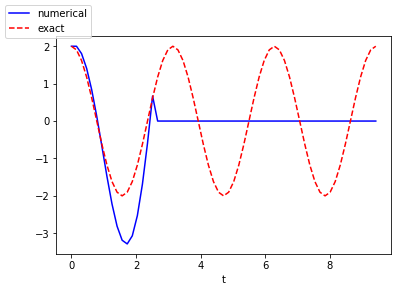

<Figure size 432x288 with 0 Axes>

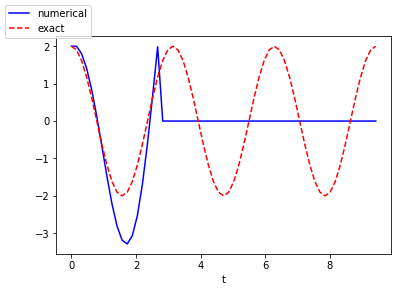

<Figure size 432x288 with 0 Axes>

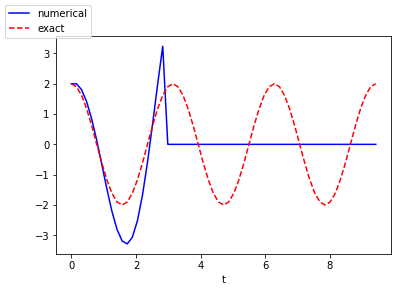

<Figure size 432x288 with 0 Axes>

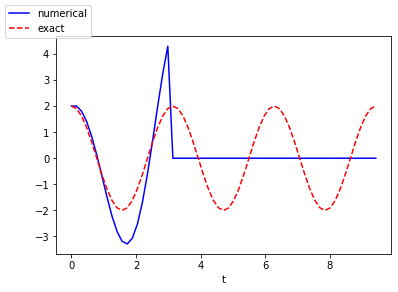

<Figure size 432x288 with 0 Axes>

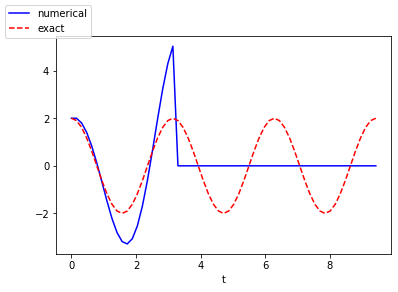

<Figure size 432x288 with 0 Axes>

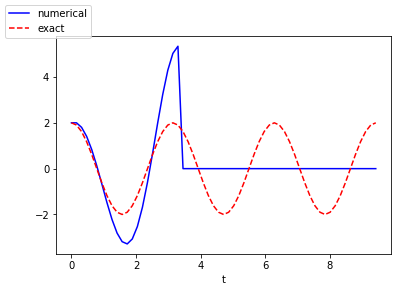

<Figure size 432x288 with 0 Axes>

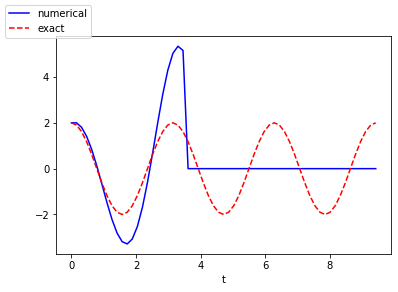

<Figure size 432x288 with 0 Axes>

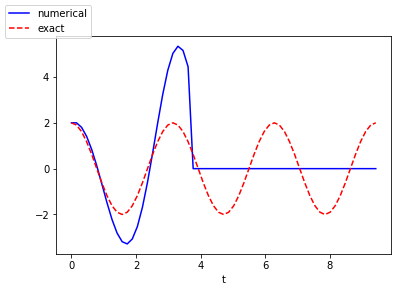

<Figure size 432x288 with 0 Axes>

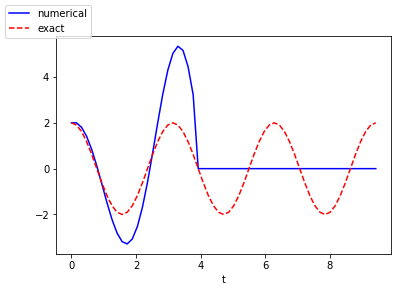

<Figure size 432x288 with 0 Axes>

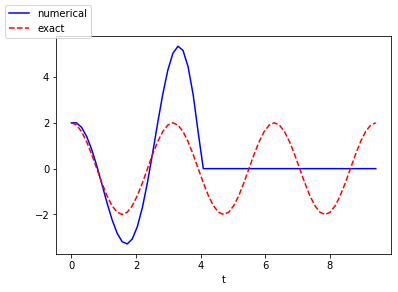

<Figure size 432x288 with 0 Axes>

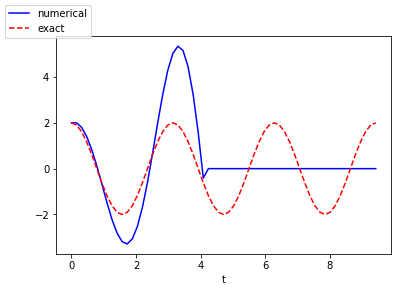

<Figure size 432x288 with 0 Axes>

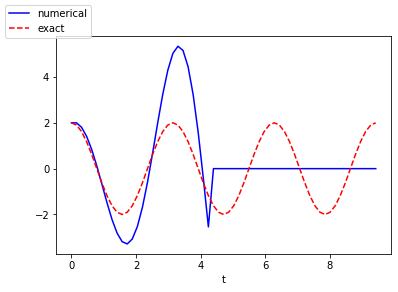

<Figure size 432x288 with 0 Axes>

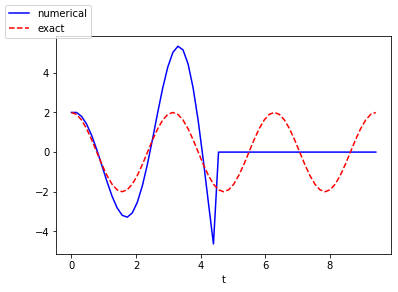

<Figure size 432x288 with 0 Axes>

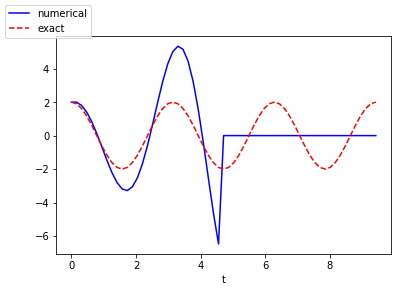

<Figure size 432x288 with 0 Axes>

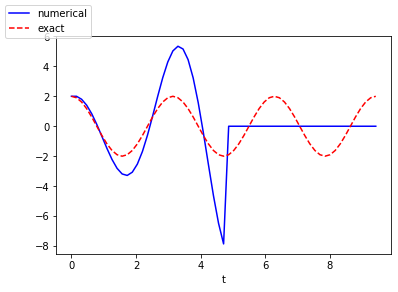

<Figure size 432x288 with 0 Axes>

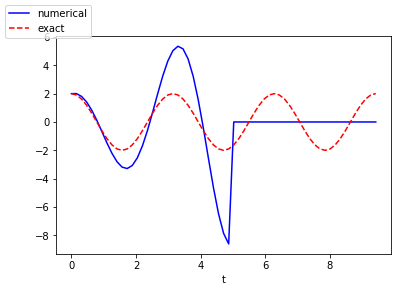

<Figure size 432x288 with 0 Axes>

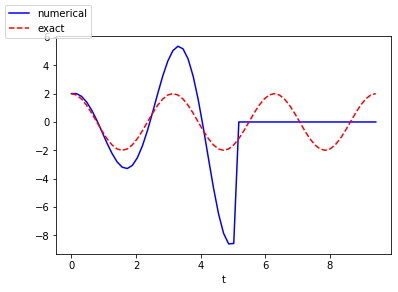

<Figure size 432x288 with 0 Axes>

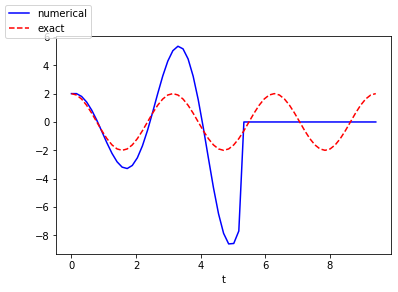

<Figure size 432x288 with 0 Axes>

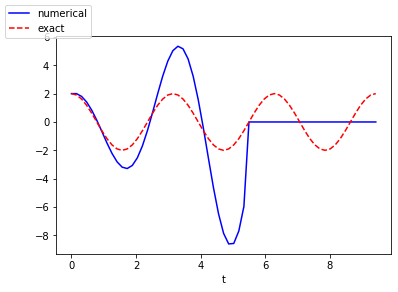

<Figure size 432x288 with 0 Axes>

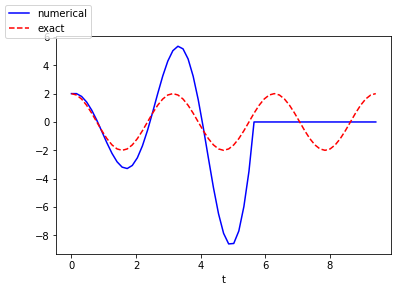

<Figure size 432x288 with 0 Axes>

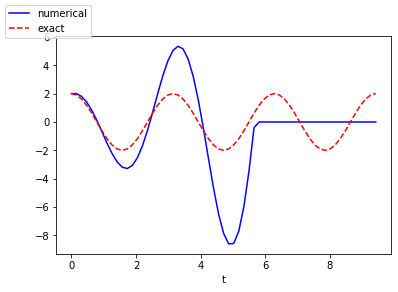

<Figure size 432x288 with 0 Axes>

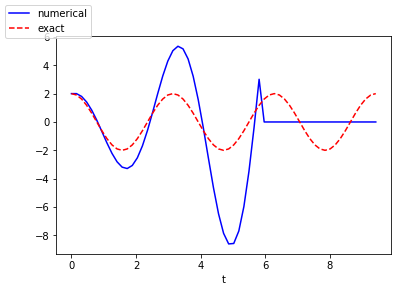

<Figure size 432x288 with 0 Axes>

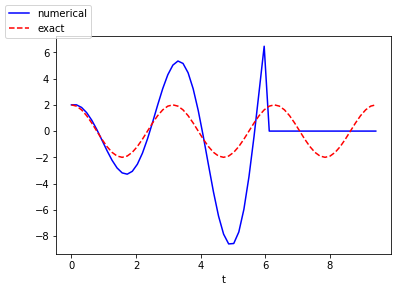

<Figure size 432x288 with 0 Axes>

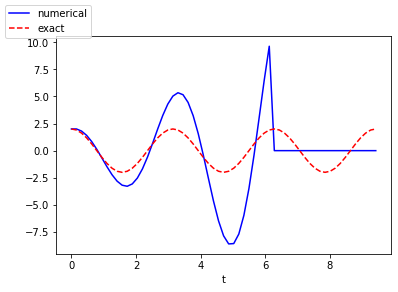

<Figure size 432x288 with 0 Axes>

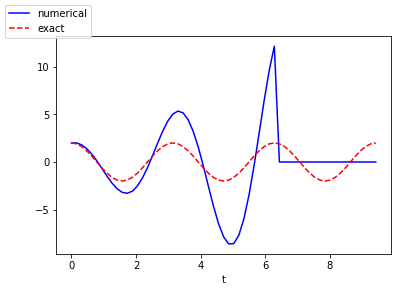

<Figure size 432x288 with 0 Axes>

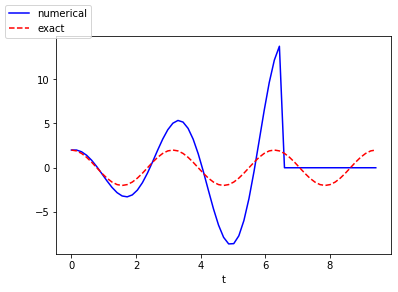

<Figure size 432x288 with 0 Axes>

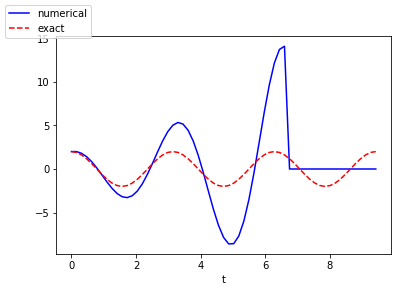

<Figure size 432x288 with 0 Axes>

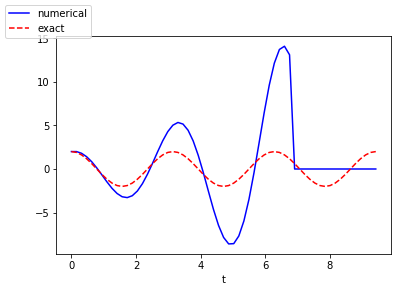

<Figure size 432x288 with 0 Axes>

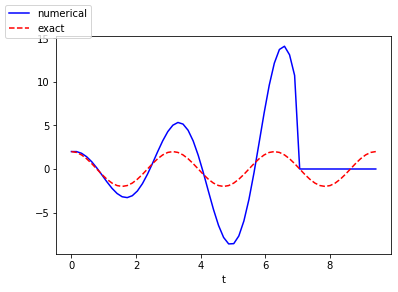

<Figure size 432x288 with 0 Axes>

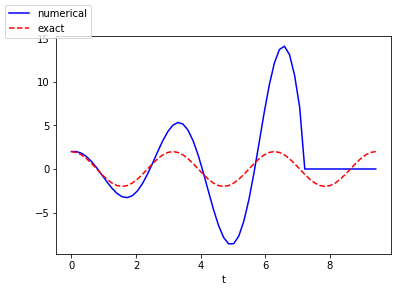

<Figure size 432x288 with 0 Axes>

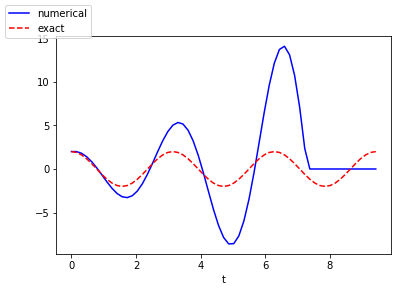

<Figure size 432x288 with 0 Axes>

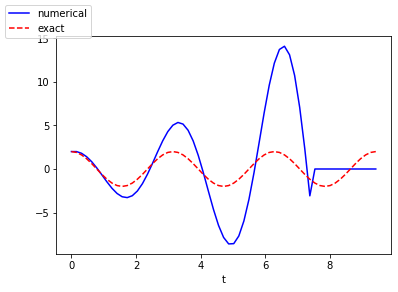

<Figure size 432x288 with 0 Axes>

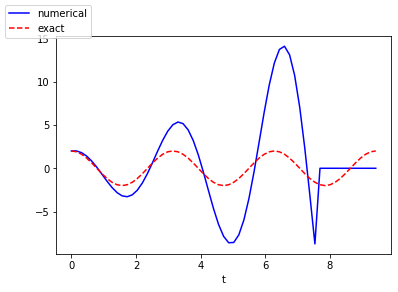

<Figure size 432x288 with 0 Axes>

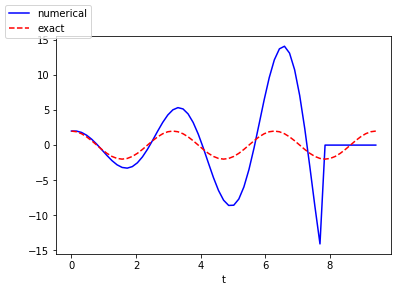

<Figure size 432x288 with 0 Axes>

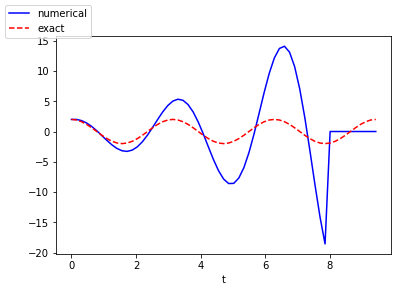

<Figure size 432x288 with 0 Axes>

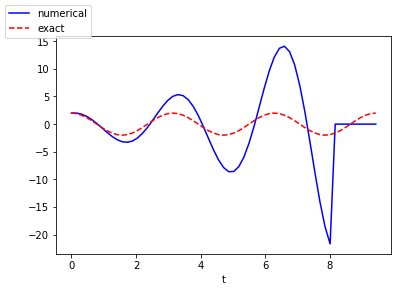

<Figure size 432x288 with 0 Axes>

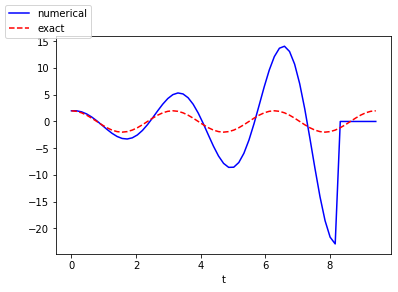

<Figure size 432x288 with 0 Axes>

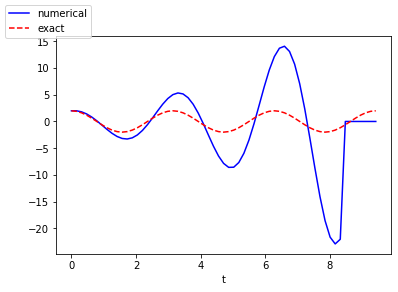

<Figure size 432x288 with 0 Axes>

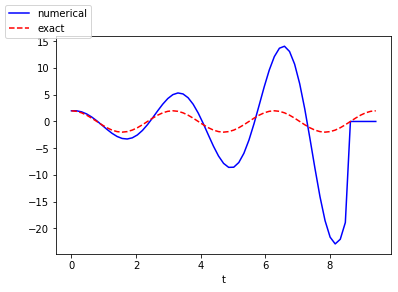

<Figure size 432x288 with 0 Axes>

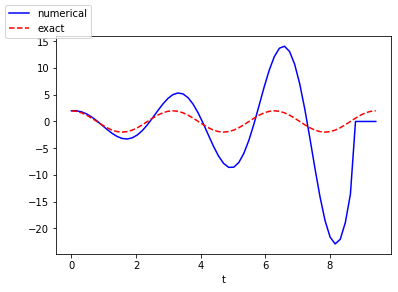

<Figure size 432x288 with 0 Axes>

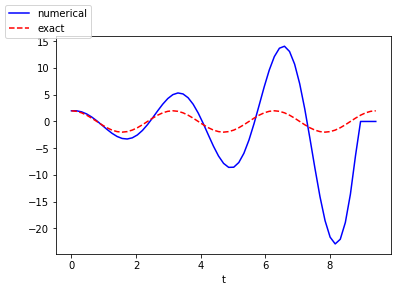

<Figure size 432x288 with 0 Axes>

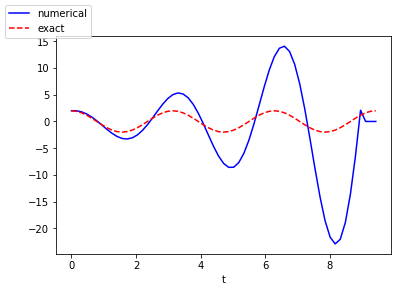

<Figure size 432x288 with 0 Axes>

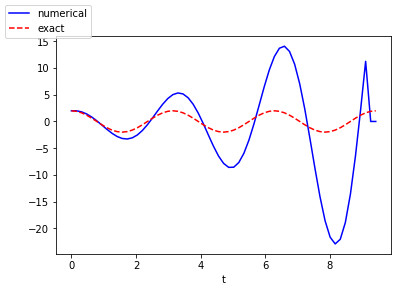

<Figure size 432x288 with 0 Axes>

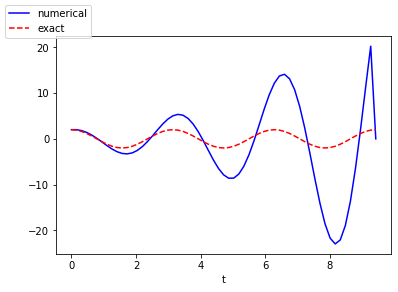

<Figure size 432x288 with 0 Axes>

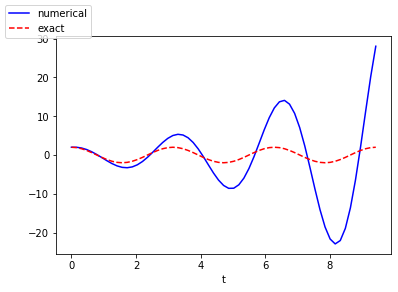

<Figure size 432x288 with 0 Axes>

In [ ]:
from numpy import zeros, linspace, pi, cos, array
import matplotlib.pyplot as plt

omega = 2 
P = 2* pi/omega
dt = P/20
T = 3* P
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)
u = zeros(N_t+1)
v = zeros(N_t+1)
# Initial condition
X_0 = 2 
u[0] = X_0
v[0] = 0 

# Step equations forward in time
for n in range(N_t):
  u[n+1] = u[n] + dt*v[n]
  v[n+1] = v[n] - dt*omega**2*u[n]
  fig = plt.figure()
  l1, l2 = plt.plot(t, u, "b-", t, X_0*cos(omega*t), "r--")
  fig.legend((l1, l2), ("numerical", "exact"), "upper left")
  plt.xlabel("t")
  plt.show()
  plt.savefig("tmp.pdf"); plt.savefig("tmp.png")

Since we already know the exact solution as u.t = x0 cos wt , we have reasoned as follows to find an appropriate simulation interval [0,T] and also how many points we should choose. The solution has a period P= 2pi/w. (The period P is the time difference between two peaks of the u(t) ~ cos wt  curve. Simulating for three periods of the cosine function, T = 3P , and choosing delta t such that there are 20 intervals per period gives delta t = P/20 and a total of Nt = T /(delta t)  intervals. 
The numerical solution looks wrong.The next step is to reduce the discretization parameter t and see if the results
become more accurate. Try (delta t) =  P /40; P /160; P /2000!
The conclusion is that the Forward Euler method has a fundamental problem with its growing amplitudes, and that a very small t is required to achieve satisfactory results. The longer the simulation is, the smaller t has to be. It is certainly time to look for more effective numerical methods.

In the Forward Euler scheme, we can replace u^n in the discretazed equation by the recently computed value u^(n+1).

The error in the backward difference is proportional to t , the same as for the forward difference (but the proportionality constant in the error term has different sign). The resulting discretization method is often referred to as a Backward Euler scheme.
To summarize, using a forward difference for the second order equation and a backward difference for the first order equation results in a much better method than just using forward differences in both equations.
u^(n+1)= u^(n)+ {(delta t) (v^(n+1))}

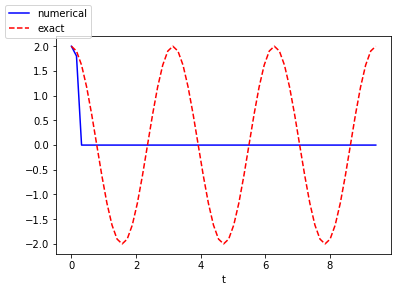

<Figure size 432x288 with 0 Axes>

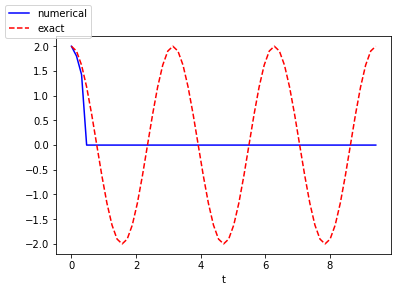

<Figure size 432x288 with 0 Axes>

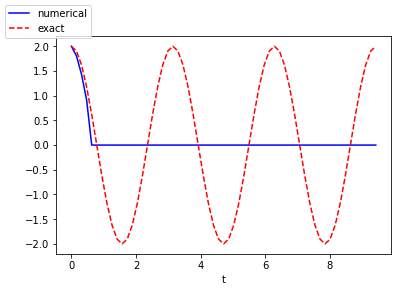

<Figure size 432x288 with 0 Axes>

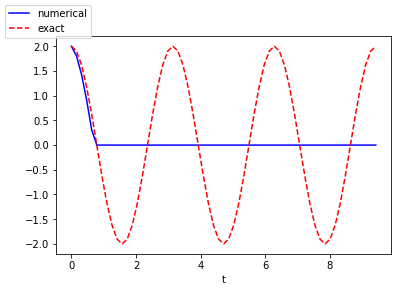

<Figure size 432x288 with 0 Axes>

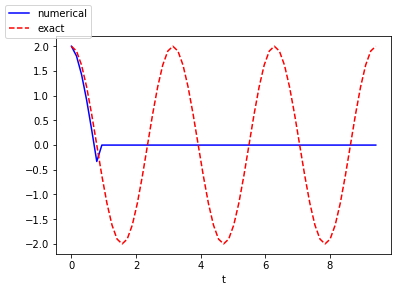

<Figure size 432x288 with 0 Axes>

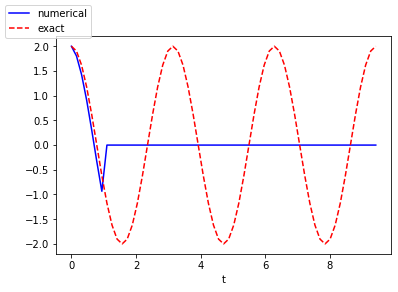

<Figure size 432x288 with 0 Axes>

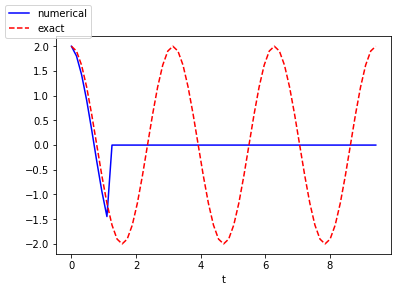

<Figure size 432x288 with 0 Axes>

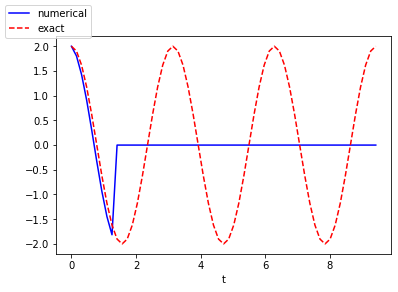

<Figure size 432x288 with 0 Axes>

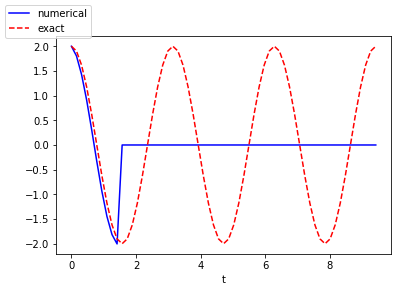

<Figure size 432x288 with 0 Axes>

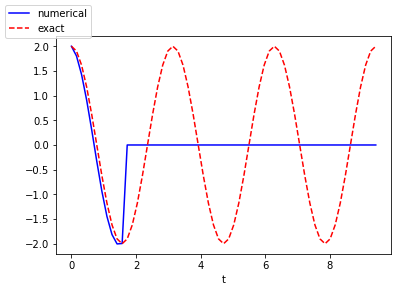

<Figure size 432x288 with 0 Axes>

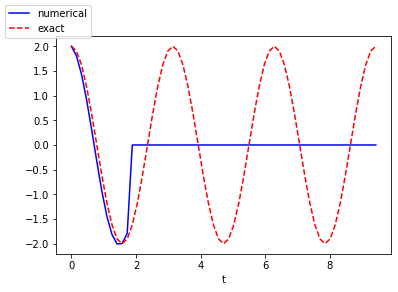

<Figure size 432x288 with 0 Axes>

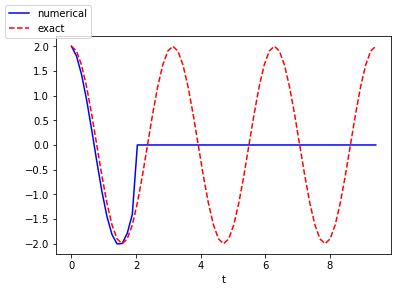

<Figure size 432x288 with 0 Axes>

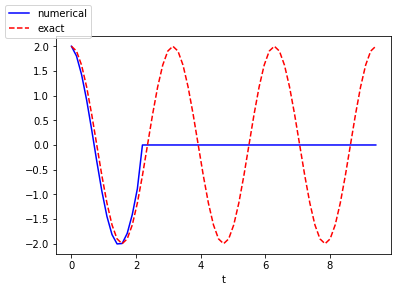

<Figure size 432x288 with 0 Axes>

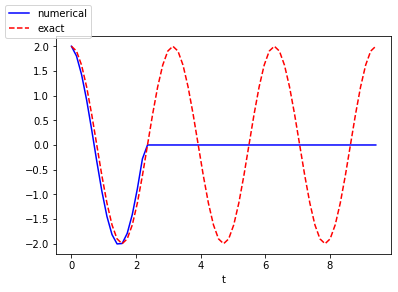

<Figure size 432x288 with 0 Axes>

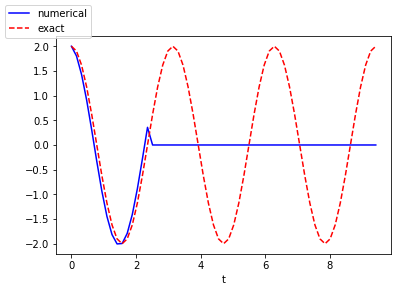

<Figure size 432x288 with 0 Axes>

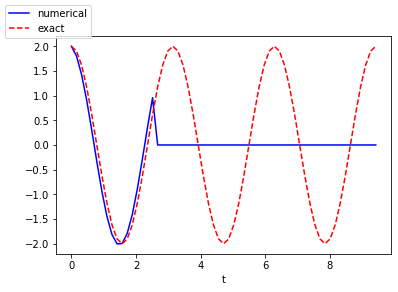

<Figure size 432x288 with 0 Axes>

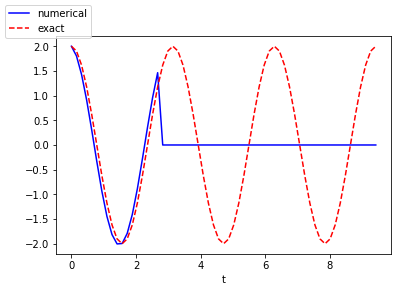

<Figure size 432x288 with 0 Axes>

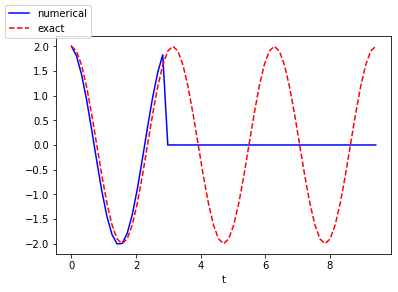

<Figure size 432x288 with 0 Axes>

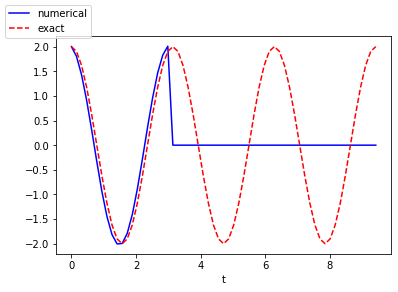

<Figure size 432x288 with 0 Axes>

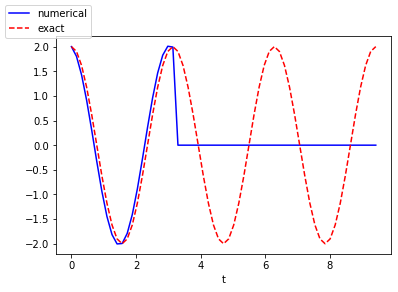

<Figure size 432x288 with 0 Axes>

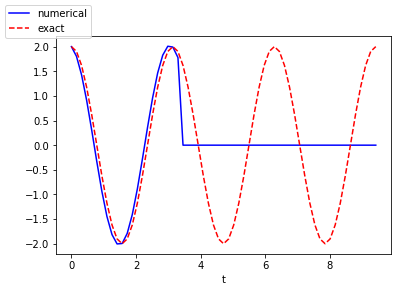

<Figure size 432x288 with 0 Axes>

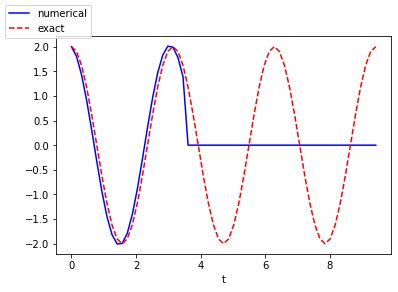

<Figure size 432x288 with 0 Axes>

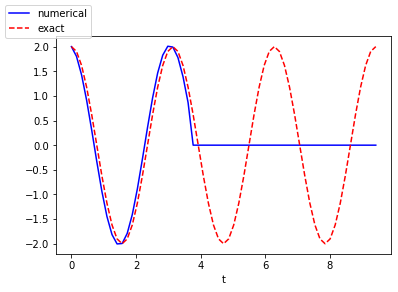

<Figure size 432x288 with 0 Axes>

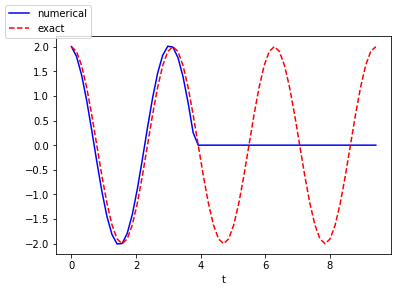

<Figure size 432x288 with 0 Axes>

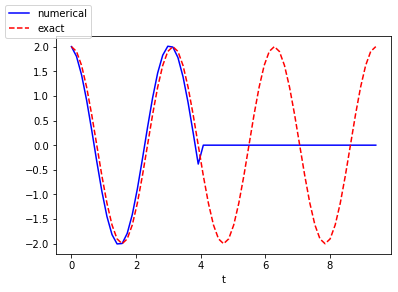

<Figure size 432x288 with 0 Axes>

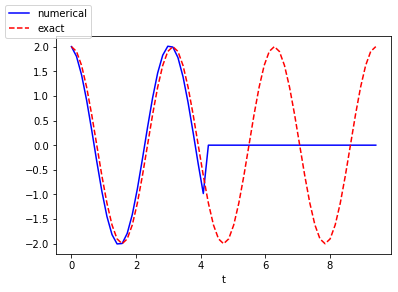

<Figure size 432x288 with 0 Axes>

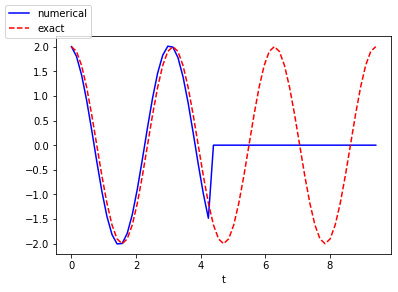

<Figure size 432x288 with 0 Axes>

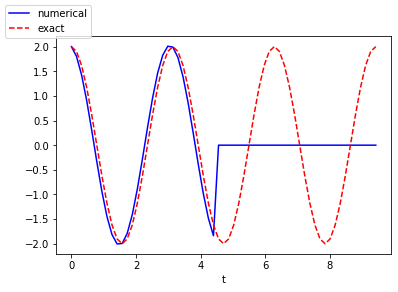

<Figure size 432x288 with 0 Axes>

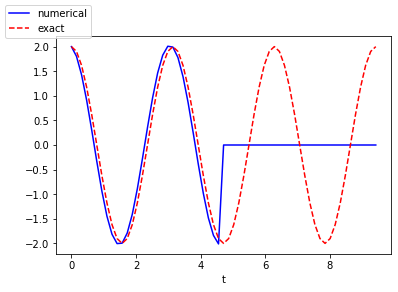

<Figure size 432x288 with 0 Axes>

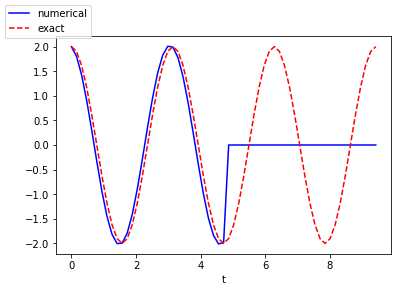

<Figure size 432x288 with 0 Axes>

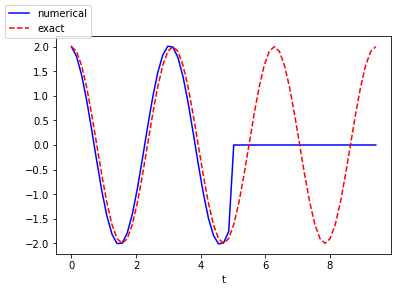

<Figure size 432x288 with 0 Axes>

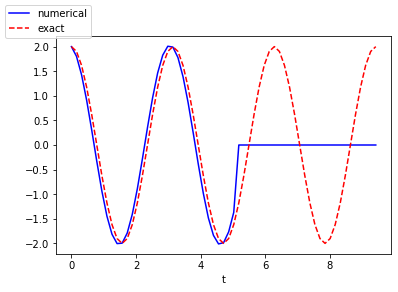

<Figure size 432x288 with 0 Axes>

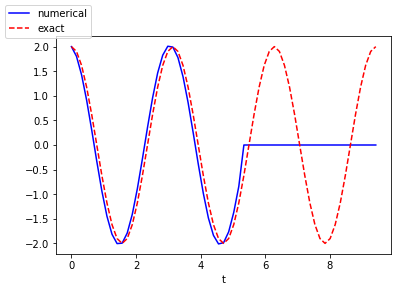

<Figure size 432x288 with 0 Axes>

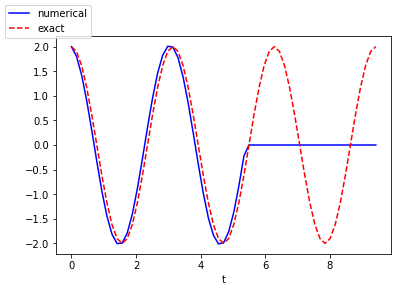

<Figure size 432x288 with 0 Axes>

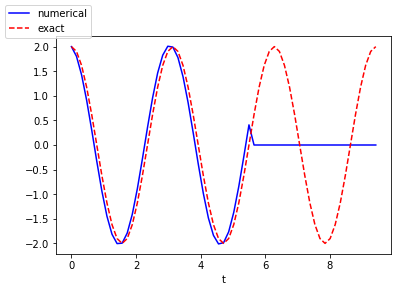

<Figure size 432x288 with 0 Axes>

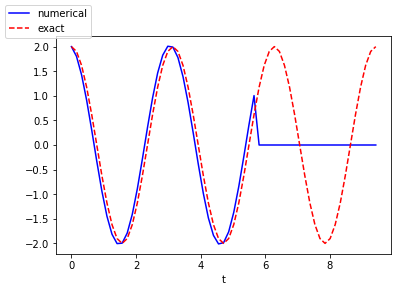

<Figure size 432x288 with 0 Axes>

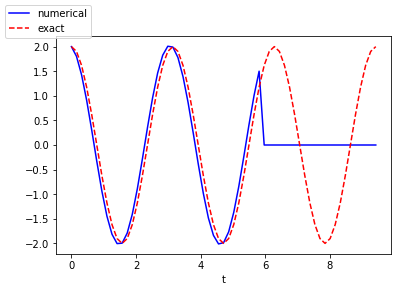

<Figure size 432x288 with 0 Axes>

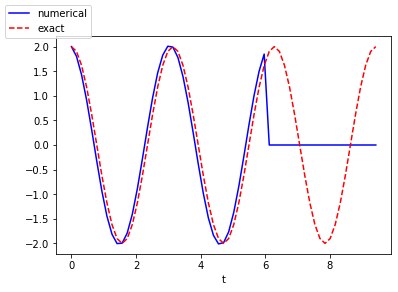

<Figure size 432x288 with 0 Axes>

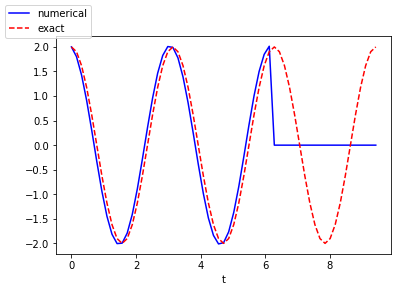

<Figure size 432x288 with 0 Axes>

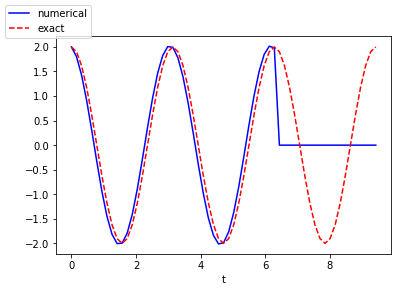

<Figure size 432x288 with 0 Axes>

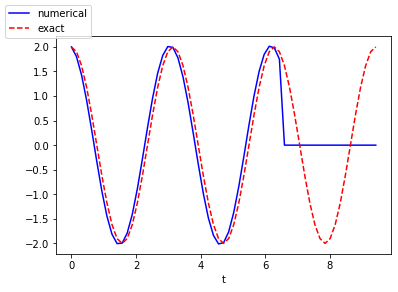

<Figure size 432x288 with 0 Axes>

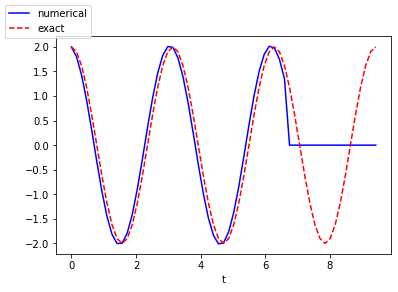

<Figure size 432x288 with 0 Axes>

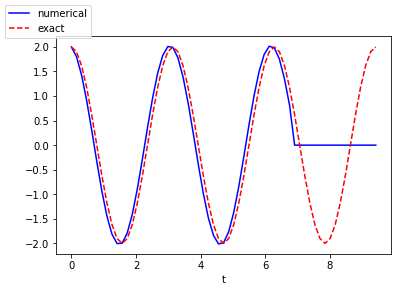

<Figure size 432x288 with 0 Axes>

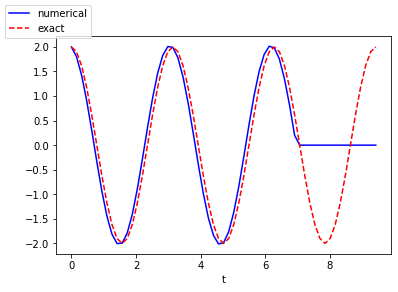

<Figure size 432x288 with 0 Axes>

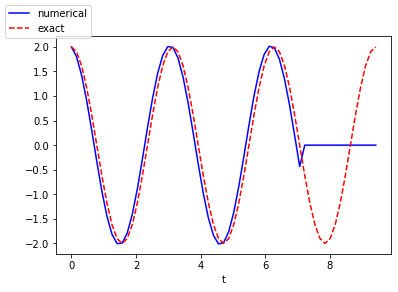

<Figure size 432x288 with 0 Axes>

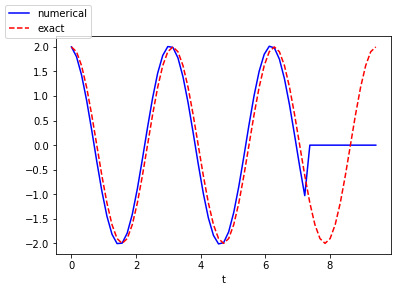

<Figure size 432x288 with 0 Axes>

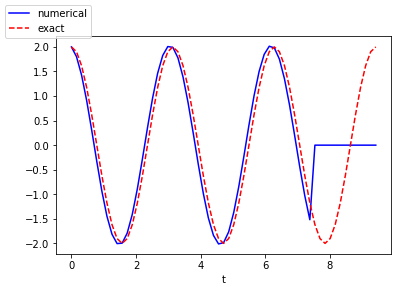

<Figure size 432x288 with 0 Axes>

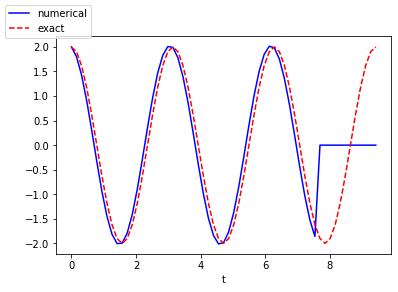

<Figure size 432x288 with 0 Axes>

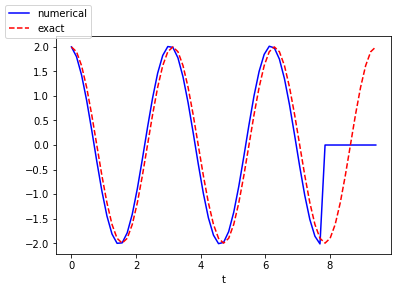

<Figure size 432x288 with 0 Axes>

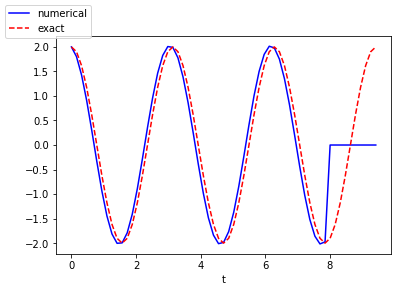

<Figure size 432x288 with 0 Axes>

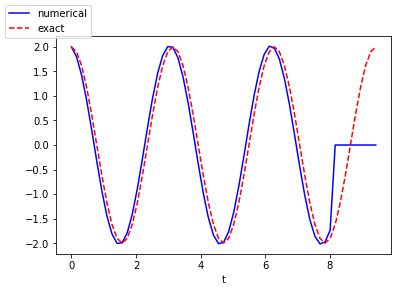

<Figure size 432x288 with 0 Axes>

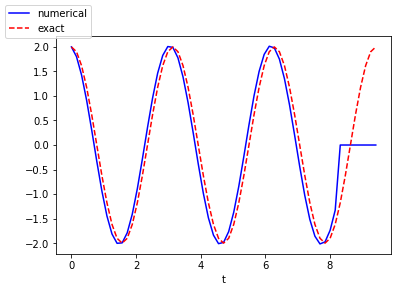

<Figure size 432x288 with 0 Axes>

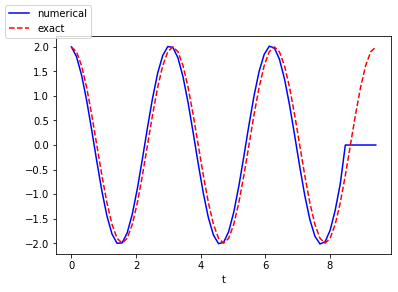

<Figure size 432x288 with 0 Axes>

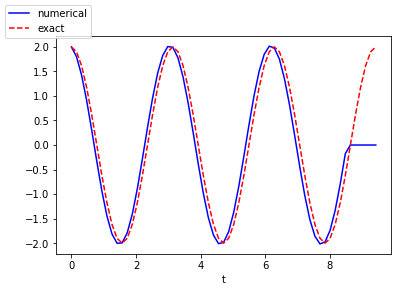

<Figure size 432x288 with 0 Axes>

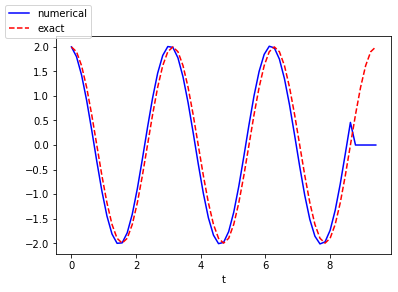

<Figure size 432x288 with 0 Axes>

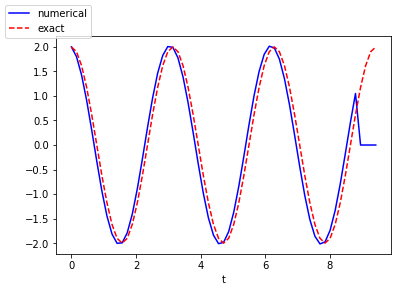

<Figure size 432x288 with 0 Axes>

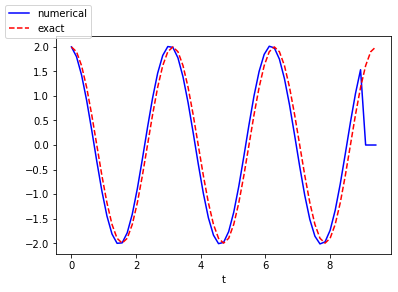

<Figure size 432x288 with 0 Axes>

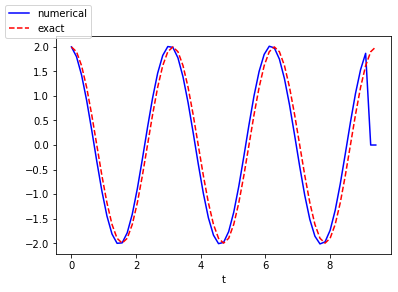

<Figure size 432x288 with 0 Axes>

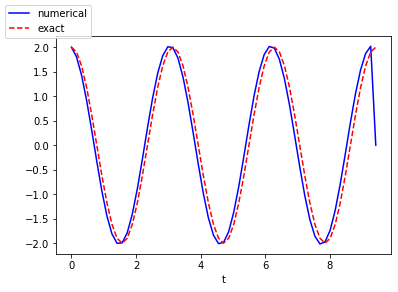

<Figure size 432x288 with 0 Axes>

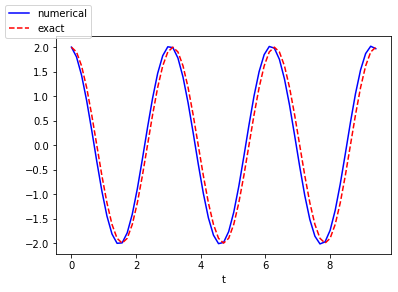

<Figure size 432x288 with 0 Axes>

In [ ]:
u = zeros(N_t+1)
v = zeros(N_t+1)
# Initial condition
u[0] = 2 
v[0] = 0 
# Step equations forward in time
for n in range(N_t):
  v[n+1] = v[n] - dt*omega**2*u[n]
  u[n+1] = u[n] + dt*v[n+1]
  fig = plt.figure()
  l1, l2 = plt.plot(t, u, "b-", t, X_0*cos(omega*t), "r--")
  fig.legend((l1, l2), ("numerical", "exact"), "upper left")
  plt.xlabel("t")
  plt.show()
  plt.savefig("tmp.pdf"); plt.savefig("tmp.png")

References to study:

https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.33.4308&rep=rep1&type=pdf